In [1]:
import sys
sys.path.insert(0,'..')

In [2]:
from dataset import ASODataset
from graph_fn import onehot_reactant_batch
from trainer import Trainer
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR
import torch
from torch_geometric.loader import DataLoader
from models import *

In [4]:
#hyperparameters
LEARNING_RATE = 7.5e-3
BATCH_SIZE = 16
NODE_INPUT_SIZE = 14
OUTPUT_SIZE_BEFORE_POOL = 30
NODE_HIDDEN_SIZE = 60
GLOB_VEC_SIZE = 10
EPOCHS = 50
DROP_OUT = 0
BOND_ATTR = 5

In [5]:
a = ASODataset(onehot_reactant_batch)
train_data, val_data = train_test_split(a.data, test_size = 0.1, random_state = 42)
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False)

c:\Users\Haoyu Fan\Desktop\GNN\GNN_enantioselectivity\runs\..\ASOhelpers.py:74: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:204.)
  edge_attr = torch.tensor(edge_attr, dtype=torch.float)


In [6]:
device = torch.device('cuda')
model = GNNModel(NODE_INPUT_SIZE, NODE_HIDDEN_SIZE, 
                      OUTPUT_SIZE_BEFORE_POOL, GLOB_VEC_SIZE, num_layers=2, dp_rate=DROP_OUT)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = ExponentialLR(optimizer, gamma=0.95)

Epoch: 001, Train Loss: 0.4974, Test Loss: 0.5263, Train MAE: 0.1120, Test MAE: 0.1272, , Train R2: 0.1972, Test R2: 0.1235
Epoch: 002, Train Loss: 0.4942, Test Loss: 0.5250, Train MAE: 0.1080, Test MAE: 0.1263, , Train R2: 0.2470, Test R2: 0.1425
Epoch: 003, Train Loss: 0.4916, Test Loss: 0.5274, Train MAE: 0.0936, Test MAE: 0.1164, , Train R2: 0.2708, Test R2: 0.1166
Epoch: 004, Train Loss: 0.4859, Test Loss: 0.5177, Train MAE: 0.0956, Test MAE: 0.1139, , Train R2: 0.3612, Test R2: 0.2367
Epoch: 005, Train Loss: 0.5025, Test Loss: 0.5293, Train MAE: 0.1305, Test MAE: 0.1397, , Train R2: 0.0980, Test R2: 0.0505
Epoch: 006, Train Loss: 0.4769, Test Loss: 0.5043, Train MAE: 0.0878, Test MAE: 0.1035, , Train R2: 0.5007, Test R2: 0.4228
Epoch: 007, Train Loss: 0.4710, Test Loss: 0.4987, Train MAE: 0.0781, Test MAE: 0.0953, , Train R2: 0.5783, Test R2: 0.4989
Epoch: 008, Train Loss: 0.4682, Test Loss: 0.4938, Train MAE: 0.0758, Test MAE: 0.0871, , Train R2: 0.6240, Test R2: 0.5672
Epoch: 0

array([0.45292851, 0.04697046, 0.84399331, 0.47528246, 0.05657551,
       0.81406794])

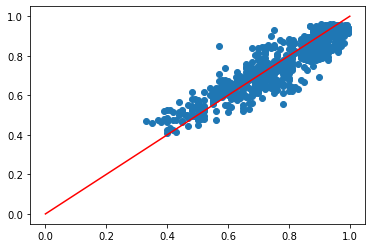

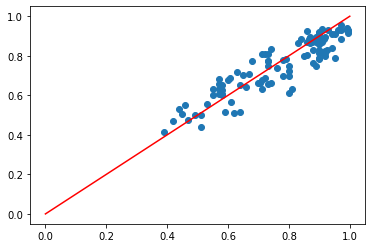

In [7]:
t = Trainer(model, device, optimizer, scheduler, glob_v= True)
t.train(train_loader, val_loader, nn.BCELoss, EPOCHS)